In [2]:
# from sq_sql import DBClient
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
plt.style.use('seaborn-whitegrid')
%matplotlib inline

In [3]:
file_name = '/home/rcruz/Projects/Okay-Bokeh/nine_charts_data_2017_10_22.csv'
data = pd.read_csv(file_name)

FileNotFoundError: File b'/home/rcruz/Projects/Okay-Bokehnine_charts_data_2017_10_22.csv' does not exist

In [ ]:
data['weekend_date'] = pd.to_datetime(data['weekend_date'])

In [ ]:
national = data[['period', 'weekend_date', 'cw_reported_sales', 'py_actual_sales', 'cw_traffic', 'py_traffic']].groupby(['period', 'weekend_date']).sum().reset_index()

In [ ]:
national['sales_growth'] = (national['cw_reported_sales'] - national['py_actual_sales']) / national['py_actual_sales']
national['traffic_growth'] = (national['cw_traffic'] - national['py_traffic']) / national['py_traffic']
national['region_order'] = 0
national['regioncode'] = 100

In [16]:
data = data[['region_order', 'regioncode', 'period', 'weekend_date', 'cw_reported_sales', 'py_actual_sales', 'sales_growth', 'cw_traffic', 'py_traffic', 'traffic_growth']]
national = national[['region_order', 'regioncode', 'period', 'weekend_date', 'cw_reported_sales', 'py_actual_sales', 'sales_growth', 'cw_traffic', 'py_traffic', 'traffic_growth']]

In [17]:
data = data.append(national)

In [18]:
data.head()

,region_order,regioncode,period,weekend_date,cw_reported_sales,py_actual_sales,sales_growth,cw_traffic,py_traffic,traffic_growth
0,1,26,201707,2017-07-02,955,853,0.1196,2015,2137.777834,-0.057432
1,2,36,201707,2017-07-02,730,606,0.2046,1826,1862.857175,-0.019785
2,3,34,201707,2017-07-02,2633,2096,0.2562,6497,6344.117580,0.024098
3,4,24,201707,2017-07-02,553,505,0.0950,1265,1278.947384,-0.010905
4,5,32,201707,2017-07-02,1454,1293,0.1245,4102,3577.142918,0.146725


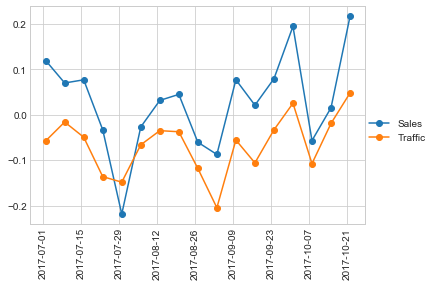

In [24]:
plt.plot(data[data['regioncode'] == 26]['weekend_date'], data[data['regioncode'] == 26]['sales_growth'], marker = 'o', label = 'Sales')
plt.plot(data[data['regioncode'] == 26]['weekend_date'], data[data['regioncode'] == 26]['traffic_growth'], marker = 'o', label = 'Traffic')
plt.legend(prop={'size': 10}, bbox_to_anchor=(1, 0.5), loc='upper left', borderaxespad=0.,)
plt.xticks(rotation=90, size = 10)
plt.show()

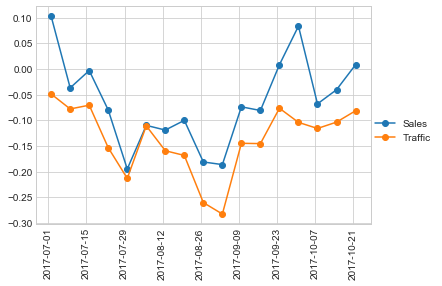

In [19]:
plt.plot(data[data['regioncode'] == 100]['weekend_date'], data[data['regioncode'] == 100]['sales_growth'], marker = 'o', label = 'Sales')
plt.plot(data[data['regioncode'] == 100]['weekend_date'], data[data['regioncode'] == 100]['traffic_growth'], marker = 'o', label = 'Traffic')
plt.legend(prop={'size': 10}, bbox_to_anchor=(1, 0.5), loc='upper left', borderaxespad=0.,)
plt.xticks(rotation=90, size = 10)
plt.show()

In [41]:
from bokeh.io import output_notebook, output_file, show
from bokeh.layouts import gridplot
from bokeh.plotting import figure
from bokeh.models import HoverTool, ColumnDataSource, CDSView, BooleanFilter, Legend
import bokeh.plotting as bp
from bokeh.models import PrintfTickFormatter

In [27]:
output_notebook()

Loading BokehJS ...

In [51]:
import datetime
data['formatted_date'] = data['weekend_date']\
.apply(lambda x: datetime.datetime.strftime(x, '%Y-%m-%d'))

In [52]:
data['sales_growth'] = data['sales_growth'] * 100
data['traffic_growth'] = data['traffic_growth'] * 100
data['formatted_sales_growth'] = [str(x) + '%' for x in (data['sales_growth']).round(2)]
data['formatted_traffic_growth'] = [str(x) + '%' for x in (data['traffic_growth']).round(2)]


In [53]:
data.head()

,region_order,regioncode,period,weekend_date,cw_reported_sales,py_actual_sales,sales_growth,cw_traffic,py_traffic,traffic_growth,closing_ratio,py_reported_sales,py_closing_ratio,week_no,formatted_date,formatted_sales_growth,formatted_traffic_growth
0,1,26,201707,2017-07-02,955,853,11.96,2015,2137.777834,-5.743246,0.4739,962,0.45,1,2017-07-02,11.96%,-5.74%
1,2,36,201707,2017-07-02,730,606,20.46,1826,1862.857175,-1.978529,0.3998,652,0.35,1,2017-07-02,20.46%,-1.98%
2,3,34,201707,2017-07-02,2633,2096,25.62,6497,6344.117580,2.409830,0.4053,2157,0.34,1,2017-07-02,25.62%,2.41%
3,4,24,201707,2017-07-02,553,505,9.50,1265,1278.947384,-1.090536,0.4372,486,0.38,1,2017-07-02,9.5%,-1.09%
4,5,32,201707,2017-07-02,1454,1293,12.45,4102,3577.142918,14.672522,0.3545,1252,0.35,1,2017-07-02,12.45%,14.67%


In [56]:
# source_24 = ColumnDataSource(data=data[data['regioncode'] == 24])
# source_26 = ColumnDataSource(data=data[data['regioncode'] == 26])
# source_32 = ColumnDataSource(data=data[data['regioncode'] == 32])
# source_34 = ColumnDataSource(data=data[data['regioncode'] == 34])
# source_36 = ColumnDataSource(data=data[data['regioncode'] == 36])
# source_42 = ColumnDataSource(data=data[data['regioncode'] == 42])
# source_44 = ColumnDataSource(data=data[data['regioncode'] == 44])
# source_48 = ColumnDataSource(data=data[data['regioncode'] == 48])

grid_body, grid_row = [], []

hover = HoverTool(tooltips=[
    ("date", "@formatted_date"),
    ("YOY sales growth", "@formatted_sales_growth"),
    ("YOY traffic growth", "@formatted_traffic_growth"),
    
])
regions = [[24,26,32], [34, 36,42], [44,48, None]]

body = []
for region_row in regions:
    row = []
    for region_number in region_row:
        if region_number is not None:
            region_name = "region " + str(region_number)
            source = ColumnDataSource(data=data[data['regioncode'] == 24])
            plot_grid = bp.figure(plot_width=250,
                                  plot_height=250,
                                  tools=[hover,'pan,wheel_zoom,box_zoom,reset'],
                                  x_axis_type="datetime",
                                  title=region_name)

            plot_grid.line(x='weekend_date',
                           y='sales_growth',
                           source=source,
                           color = 'black',
                           legend = 'sales')

            plot_grid.circle(x="weekend_date",
                             y="sales_growth",
                             size=3,
                             color='black',
                             hover_color="red",
                             source=source)

            plot_grid.line(x='weekend_date',
                           y='traffic_growth',
                           source=source,
                           color = 'red',
                           legend = 'traffic')

            plot_grid.circle(x="weekend_date",
                             y="traffic_growth",
                             size=3,
                             color='red',
                             hover_color="red",
                             source=source)

            plot_grid.yaxis[0].formatter = PrintfTickFormatter(format='%0.0f %%')
            plot_grid.yaxis.axis_label='YOY'
            plot_grid.legend.location = "top_center"
            grid_row.append(plot_grid)
        else:
            grid_row.append(None)
    grid_body.append(grid_row)
    grid_row = []

p = gridplot(grid_body)

# output_file('daily sales.html')
show(p)

In [28]:
from bokeh.io import output_file, show
from bokeh.layouts import gridplot
from bokeh.plotting import figure

# output_file("layout.html")

x = list(range(11))
y0 = x
y1 = [10-i for i in x]
y2 = [abs(i-5) for i in x]

# create a new plot
s1 = figure(width=250, plot_height=250, title=None)
s1.circle(x, y0, size=10, color="navy", alpha=0.5)

# create another one
s2 = figure(width=250, height=250, title=None)
s2.triangle(x, y1, size=10, color="firebrick", alpha=0.5)

# create and another
s3 = figure(width=250, height=250, title=None)
s3.square(x, y2, size=10, color="olive", alpha=0.5)

# put all the plots in a grid layout
p = gridplot([[s1, s2], [None, s3]])

# show the results
show(p)